In [226]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request as req
import pandas as pd
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [227]:
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/iris.txt'
req.urlretrieve(url,'ame.txt')

('ame.txt', <http.client.HTTPMessage at 0x11a817cc0>)

In [228]:
df = pd.read_csv('ame.txt','\t',usecols=range(1,6))

In [229]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [230]:
df.columns.values

array(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'], dtype=object)

In [231]:
df_norm = (df - df.mean(axis=0))/df.std(axis=0)
df_norm = df_norm.drop('Species',axis=1)

In [232]:
pca = PCA(3)
pca.fit(df_norm)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [233]:
feature = pca.transform(df_norm)

In [234]:
df_pca0, df_pca1, df_pca2 = feature[:50], feature[50:100], feature[100:]

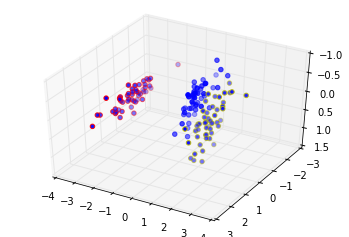

In [235]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='b')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='y')
ax.view_init(320,60)
plt.show()

In [236]:
df0, df1, df2 = df[df.Species == 0], df[df.Species == 1], df[df.Species == 2]

In [237]:
df0.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [238]:
df1.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [239]:
df2.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [240]:
df0_mean, df0_sd = df0.mean(axis=0), df0.std(axis=0)

In [241]:
df0_mean, df0_sd

(Sepal.Length    5.006
 Sepal.Width     3.428
 Petal.Length    1.462
 Petal.Width     0.246
 Species         0.000
 dtype: float64, Sepal.Length    0.352490
 Sepal.Width     0.379064
 Petal.Length    0.173664
 Petal.Width     0.105386
 Species         0.000000
 dtype: float64)

In [242]:
df1_mean, df1_sd = df1.mean(axis=0), df1.std(axis=0)
df2_mean, df2_sd = df2.mean(axis=0), df2.std(axis=0)

In [243]:
df0_mean, df1_mean, df2_mean

(Sepal.Length    5.006
 Sepal.Width     3.428
 Petal.Length    1.462
 Petal.Width     0.246
 Species         0.000
 dtype: float64, Sepal.Length    5.936
 Sepal.Width     2.770
 Petal.Length    4.260
 Petal.Width     1.326
 Species         1.000
 dtype: float64, Sepal.Length    6.588
 Sepal.Width     2.974
 Petal.Length    5.552
 Petal.Width     2.026
 Species         2.000
 dtype: float64)

In [244]:
df0_plot, df1_plot, df2_plot = df0.filter(items=['Sepal.Length','Sepal.Width','Petal.Length']),\
df1.filter(items=['Sepal.Length','Sepal.Width','Petal.Length']),df2.filter(items=['Sepal.Length','Sepal.Width','Petal.Length'])

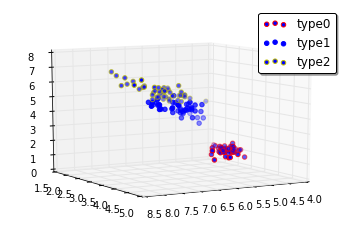

In [245]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='b', label='type1')
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='y', label='type2')
ax.view_init(10,60)
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

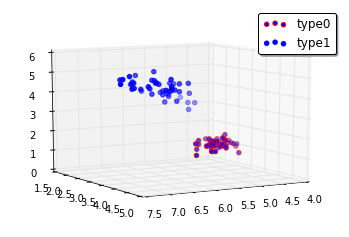

In [246]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='b', label='type1')
ax.view_init(10,60)
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

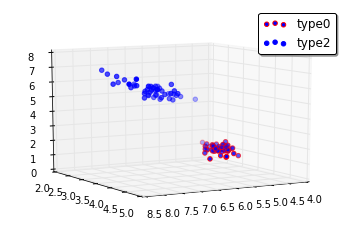

In [247]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df0_plot['Sepal.Length'], df0_plot['Sepal.Width'], df0_plot['Petal.Length'], color='r', label='type0')
ax.view_init(10,60)
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='b', label='type2')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

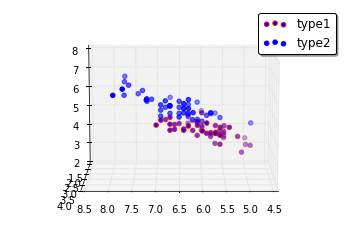

In [248]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(df1_plot['Sepal.Length'], df1_plot['Sepal.Width'], df1_plot['Petal.Length'], color='r', label='type1')
ax.view_init(10,90)
ax.scatter(df2_plot['Sepal.Length'], df2_plot['Sepal.Width'], df2_plot['Petal.Length'], color='b', label='type2')
ax.legend(loc='best',fancybox=True, shadow=True)
plt.show()

# 予測

In [249]:
df_use = shuffle(df)
df_use

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
55,5.7,2.8,4.5,1.3,1
90,5.5,2.6,4.4,1.2,1
120,6.9,3.2,5.7,2.3,2
129,7.2,3.0,5.8,1.6,2
63,6.1,2.9,4.7,1.4,1
111,6.4,2.7,5.3,1.9,2
133,6.3,2.8,5.1,1.5,2
122,7.7,2.8,6.7,2.0,2
87,6.3,2.3,4.4,1.3,1
121,5.6,2.8,4.9,2.0,2


In [250]:
X_train = df_use[:100]
X_val = df_use[100:]
Y_train, Y_val = X_train['Species'], X_val['Species']
X_train, X_val = X_train.drop('Species', axis=1), X_val.drop('Species', axis=1)

In [251]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
55,5.7,2.8,4.5,1.3
90,5.5,2.6,4.4,1.2
120,6.9,3.2,5.7,2.3
129,7.2,3.0,5.8,1.6
63,6.1,2.9,4.7,1.4


In [252]:
model = svm.SVC()

In [253]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [254]:
model.score(X_val, Y_val)

0.97999999999999998

In [255]:
Y_predict = model.predict(X_val)
print(Y_predict, Y_val.as_matrix())

[0 1 1 0 0 1 0 2 1 2 2 2 1 1 1 0 2 1 1 2 0 2 0 2 1 1 0 0 1 1 0 1 1 1 1 0 2
 0 1 0 2 0 0 0 2 0 1 2 0 0] [0 1 1 0 0 1 0 2 1 2 2 2 1 1 1 0 2 1 1 2 0 2 0 1 1 1 0 0 1 1 0 1 1 1 1 0 2
 0 1 0 2 0 0 0 2 0 1 2 0 0]


In [256]:
predicted = model.predict(df[50:51].drop('Species', axis=1))

In [257]:
predicted

array([1])

In [258]:
df[50:51]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,1


# 予測

In [259]:
feature[:,0]

array([-2.25714118, -2.07401302, -2.35633511, -2.29170679, -2.3818627 ,
       -2.06870061, -2.43586845, -2.22539189, -2.32684533, -2.17703491,
       -2.15907699, -2.31836413, -2.2110437 , -2.62430902, -2.19139921,
       -2.25466121, -2.20021676, -2.18303613, -1.89223284, -2.33554476,
       -1.90793125, -2.19964383, -2.76508142, -1.81259716, -2.21972701,
       -1.9453293 , -2.04430277, -2.1613365 , -2.13241965, -2.25769799,
       -2.13297647, -1.82547925, -2.60621687, -2.43800983, -2.10292986,
       -2.20043723, -2.03831765, -2.51889339, -2.42152026, -2.16246625,
       -2.27884081, -1.85191836, -2.54511203, -1.95788857, -2.12992356,
       -2.06283361, -2.37677076, -2.38638171, -2.22200263, -2.19647504,
        1.09810244,  0.72889556,  1.2368358 ,  0.40612251,  1.07188379,
        0.38738955,  0.74403715, -0.48569562,  0.92480346,  0.01138804,
       -0.10982834,  0.43922201,  0.56023148,  0.71715934, -0.03324333,
        0.87248429,  0.34908221,  0.1582798 ,  1.22100316,  0.16

In [260]:
data = pd.DataFrame({'0':feature[:,0],'1':feature[:,1],'2':feature[:,2]})

In [261]:
data['Species'] = df['Species']

In [262]:
data.head()

,0,1,2,Species
0,-2.257141,0.478424,-0.127280,0
1,-2.074013,-0.671883,-0.233826,0
2,-2.356335,-0.340766,0.044054,0
3,-2.291707,-0.595400,0.090985,0
4,-2.381863,0.644676,0.015686,0


In [263]:
scramble = shuffle(data)
scramble

,0,1,2,Species
112,1.877611,0.417850,0.026250,2
19,-2.335545,1.124084,0.132188,0
8,-2.326845,-1.111604,0.144592,0
64,-0.033243,-0.437537,0.194282,1
70,0.735220,0.395247,0.614468,1
114,1.462745,-0.440795,1.000518,2
122,2.887977,0.412260,-0.854559,2
58,0.924803,0.032118,-0.594179,1
94,0.287623,-0.852873,0.130453,1
10,-2.159077,1.040206,-0.267784,0


In [264]:
X_train = scramble[:100]
X_val = scramble[100:]
Y_train, Y_val = X_train['Species'], X_val['Species']
X_train, X_val = X_train.drop('Species', axis=1), X_val.drop('Species', axis=1)

In [265]:
model = svm.LinearSVC()
model.fit(X_train, Y_train)
model.score(X_val,Y_val)

0.88

In [266]:
min(data['0']),max(data['0']),min(data['1']),max(data['1']),min(data['2']),max(data['2'])

(-2.7650814226329521,
 3.299641477668366,
 -2.6452111149372044,
 2.6773152297366059,
 -0.85455897272513837,
 1.0020440766239431)

In [267]:
x1min,x1max,x2min,x2max,x3min,x3max = min(data['0']),max(data['0']),min(data['1']),max(data['1']),min(data['2']),max(data['2'])

In [268]:
coef = model.coef_
inter = model.intercept_

In [269]:
X_dis = np.linspace(x1min,x1max,600)
Y_dis = np.linspace(x2min,x2max,600)
X_dis,Y_dis = np.meshgrid(X_dis,Y_dis)
Z_1 = (inter[0] - coef[0,0] * X_dis - coef[0,1] * Y_dis)/coef[0,2]
Z_2 = (inter[1] - coef[1,0] * X_dis - coef[1,1] * Y_dis)/coef[1,2]
Z_3 = (inter[2] - coef[2,0] * X_dis - coef[2,1] * Y_dis)/coef[2,2]

In [270]:
Z

array([[ 10.40209027,  10.36616375,  10.33023723, ..., -11.04604319,
        -11.08196971, -11.11789623],
       [ 10.40909184,  10.37316532,  10.3372388 , ..., -11.03904162,
        -11.07496814, -11.11089466],
       [ 10.41609341,  10.38016689,  10.34424037, ..., -11.03204004,
        -11.06796657, -11.10389309],
       ..., 
       [ 14.58202797,  14.54610145,  14.51017493, ...,  -6.86610549,
         -6.90203201,  -6.93795853],
       [ 14.58902954,  14.55310302,  14.5171765 , ...,  -6.85910392,
         -6.89503044,  -6.93095696],
       [ 14.59603111,  14.56010459,  14.52417807, ...,  -6.85210235,
         -6.88802887,  -6.92395539]])

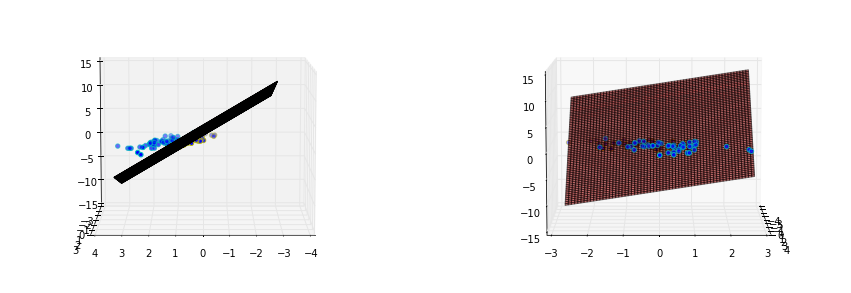

In [271]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X_dis,Y_dis,Z_1,color='red',alpha=1)
ax.view_init(8,90)
#ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='y')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='c')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(8,0)
ax.plot_surface(X_dis,Y_dis,Z_1,color='red',alpha=0.5)
#ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='y')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='c')
plt.show()

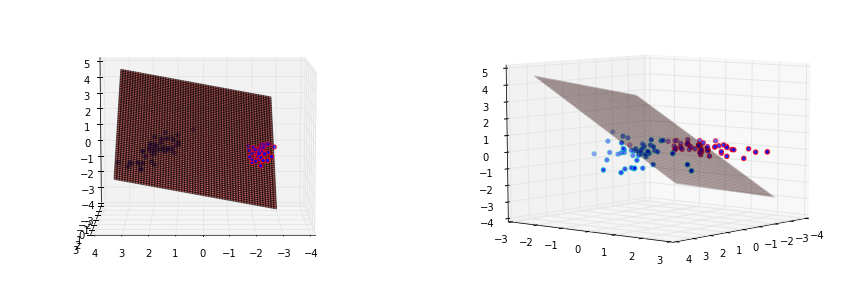

In [272]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X_dis,Y_dis,Z_2,color='red',alpha=0.5)
ax.view_init(8,90)
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
#ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='y')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='c')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(8,1120)
ax.plot_surface(X_dis,Y_dis,Z_2,color='red',alpha=0.1)
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
#ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='y')
ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='c')
plt.show()

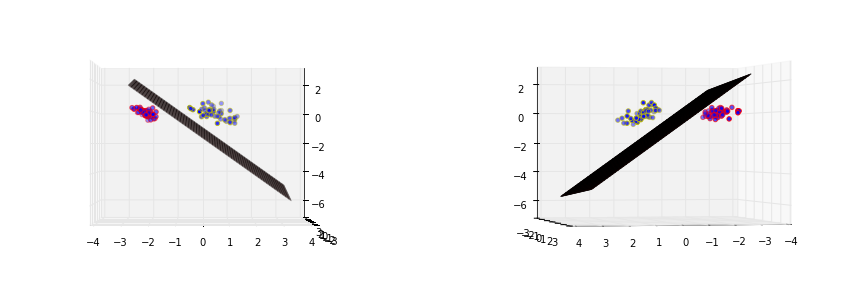

In [273]:
fig = plt.figure(figsize = (15,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X_dis,Y_dis,Z_3,color='red',alpha=0.1)
ax.view_init(0,-90)
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='y')
#ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='c')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(0,78)
ax.plot_surface(X_dis,Y_dis,Z_3,color='red',alpha=0.5)
ax.scatter(df_pca0[:,0], df_pca0[:,1],df_pca0[:,2],color='r')
ax.scatter(df_pca1[:,0], df_pca1[:,1],df_pca1[:,2],color='y')
#ax.scatter(df_pca2[:,0], df_pca2[:,1],df_pca2[:,2],color='c')
plt.show()